In [154]:
import numpy as np
import matplotlib.pyplot as plt
import math

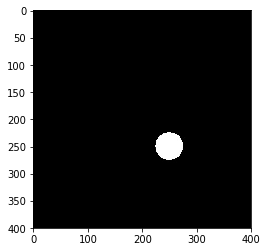

In [263]:
img = plt.imread('img/dot.jpg')
plt.imshow(img, cmap='gray')

In [264]:
img.shape

(400, 400, 3)

In [265]:
pixSums = np.zeros(400)

In [266]:
img[0][0]

array([0, 0, 0], dtype=uint8)

In [267]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

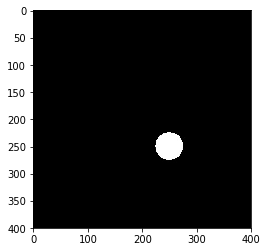

In [268]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')

In [269]:
gray.shape

(400, 400)

In [270]:
for i in range(gray.shape[0]):
    pixSums[i] = pixSums[i] + sum(gray[i])

In [271]:
x = np.linspace(0, 400, 400)

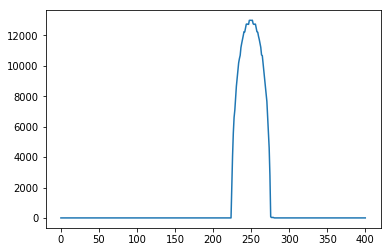

In [272]:
plt.plot(x, pixSums)

In [273]:
def rotate_line(line, origin, angle):
    origin_x, origin_y = origin
    rotated_line = []
    for point in line:
        x, y = point
        rotated_x = int(origin_x + math.cos(angle) * (x - origin_x) - math.sin(angle) * (y - origin_y))
        rotated_y = int(origin_y + math.sin(angle) * (x - origin_x) + math.cos(angle) * (y - origin_y))
        rotated_line.append((rotated_x, rotated_y))
    return rotated_line

In [274]:
def generate_initial_emiters_and_detectors(picture, number_of_detectors, range_angle):
    diameter = calc_diameter_of_tomograph(picture)
    radius = diameter / 2
    width = 2 * (radius * math.sin(range_angle/2) )
    x_cords = np.linspace(-width/2, width/2, number_of_detectors)
    emiters = [(int(x + picture.shape[1] / 2) , int(radius - picture.shape[0] / 2)) for x in x_cords]
    detectors = [(int(x), -int(radius)) for x in x_cords]
    return emiters, detectors

In [275]:
def calc_diameter_of_tomograph(picture):
    return math.sqrt(math.pow(picture.shape[0], 2) + math.pow(picture.shape[1], 2))

In [276]:
%run bresenham.ipynb
def generate_sinogram_and_lines(picture, step, number_of_detectors):
    lines = []
    center = picture.shape[1] / 2 , picture.shape[0] / 2
    gray = rgb2gray(picture)
    emiters, detectors = generate_initial_emiters_and_detectors(picture, number_of_detectors, math.pi/4)
    sinogram = np.zeros((number_of_detectors, int(math.pi/step)))
    for i, alpha in enumerate(np.linspace(0, math.pi, math.pi/step)):
        lines_for_alpha = []
        emiters, detectors = rotate_line(emiters, center, alpha), rotate_line(detectors, center, alpha)
        for j, (p0, p1) in enumerate(zip(emiters, detectors)):
            line = bresenham(p0, p1)
            lines_for_alpha.append(line)
            sinogram[j, i] = sum([picture[int(x), int(y)] for (x, y) in line if (x < picture.shape[0] and y < picture.shape[1])])
        lines.append(lines_for_alpha)
    sinogram = sinogram / sinogram.max()
    sinogram = sinogram * 255
    return sinogram, lines
    

In [277]:
sinogram, lines = generate_sinogram_and_lines(gray, math.pi/30, 20)

C:\Users\Jacek\Anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


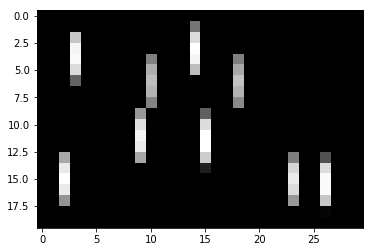

In [278]:
plt.imshow(s, cmap='gray')

In [279]:
def restore_picture(sinogram, lines, picture_shape):
    picture = np.zeros(picture_shape)
    for i, lines_for_alpha in enumerate(lines):
        for j, line in enumerate(lines_for_alpha):
            for x, y in line:
                if (x < picture_shape[0] and y < picture_shape[1]):
                    picture[x,y] += sinogram[j, i]
    picture = picture / picture.max()
    picture = picture * 255
    return picture

In [280]:
pic = restore_picture(s, lines, gray.shape)

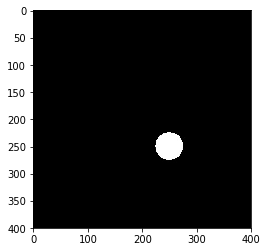

In [281]:
plt.imshow(gray, cmap='gray')

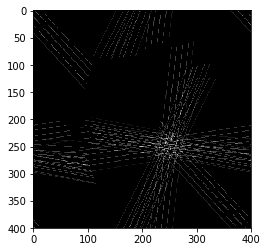

In [282]:
plt.imshow(pic, cmap='gray')